# Assignment 1 Part B
#### 11482 - Pattern Recognition and Machine Learning
#### James McGuinness (u3196600)
#### 

# 1. Introduction
Introduce the problem you wish to solve (use the MNIST case as a guide). Explain what questions would you want to ask from the selected dataset?  
*(10 pts)*

- Referring to *LogisticRegression_PRML_MNIST.pdf* from Week 3:
  - "human benchmark for classifying MNIST is about 97.5% accuracy"
- I would like to see if I can score this
- Noting this is a different dataset

https://www.kaggle.com/datasets/zalando-research/fashionmnist

# 2. Dataset Description
What do the rows and columns mean and are there any special characteristics in the data to use in modelling the learning?  
How would you visualise data to extract patterns to use?  
*(5 pts)*

- The Fashion-MNIST dataset contains pictures clothing. 
- The clothing is from a brand called Zalando. From a brief search online it appears Zalando is a clothing retailer and tech company.
- Each picture is 28x28 pixels = 748 pixels
- Each row represents an individual piece of clothing 
- Column 1 is the class label 
- Columns 2 to 748 are pixel integers, range from 1 to 255. 
- This is actually a larger dataset than I expected, don't let the simplicity of the pictures fool you lol.

# 3. Logistic Regression Explanation
Why would Logistic Regression suit as the learning model to answer the questions?  
Explain why Logistic Regression suits the dataset and problems  
*(5 pts)*

- I guess it's categorical data, so we'll use a classification algorithm 

# 4. Retrieving data
Retrieving data in the program - explain how this is done?  
*(5 pts)*

- I chose to down load the zip file, there are numerous other ways however, I believe this is easy and simple regarding marking purposes and modulation of code.
- Download zip folder from https://www.kaggle.com/datasets/zalando-research/fashionmnist
- Extract the zip file to directory .\Fashion-MNIST
- Run below statements to import

In [18]:
import pandas as pd
train = pd.read_csv('.\\Fashion-MNIST\\fashion-mnist_train.csv')
test = pd.read_csv('.\\Fashion-MNIST\\fashion-mnist_test.csv')

# 5. Exploring the data
Explain any special adaptation and characteristics  
Explore data for patterns and relationships as used in the design  
Use visualisation and other relevant statistics measures (as for MNIST).  
*(5 pts)*

## i. Show image & data

In [19]:
label_mapping = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}
train['label'] = train['label'].map(label_mapping)
test['label'] = test['label'].map(label_mapping)

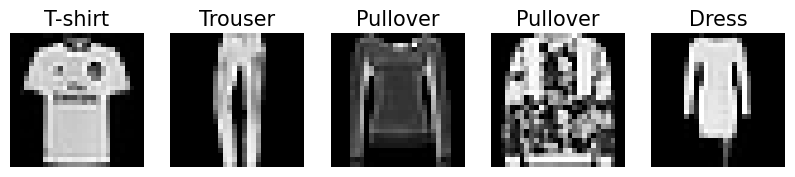

In [20]:
import numpy as np
import matplotlib.pyplot as plt

labels = train['label'].values
images = train.drop('label', axis=1).values

labels = test['label'].values
images = test.drop('label', axis=1).values

plt.figure(figsize=(10,2))
for idx in range(5):
    image = images[idx]
    label = labels[idx]
    plt.subplot(1, 5, idx + 1)
    plt.imshow(image.reshape(28, 28), cmap=plt.cm.gray)
    plt.title(f'{label}', fontsize=15)
    plt.axis('off')

plt.show()

## ii. Show corresponding matrix

In [ ]:
train

In [ ]:
print(np.array(train.iloc[1, 1:]).reshape(28, 28))

## iii. Describe & understand the data

TODO

# 6. Build a Logistic Regression Model
Explain logistic regression and how it suits the chosen dataset and the problem?  
*(6 pts)*

TODO

## i. Load packages

In [21]:
import sys
sys.path.append('C:\\Users\\James\\Desktop\\RoboticsJourney\\Self_Study\\1.PatternReg.ML\\introduction_to_ml_with_python')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## ii. Select Target Variable

In [22]:
y = train['label']

## iii. Prepare data

In [ ]:
n_samples = len(train)
n_samples
train.shape

## iv. Split data into training and validation set

In [ ]:
print(len(train))
print(len(test))

In [23]:
X_train = train.drop('label', axis=1)
y_train = train['label']

X_test = test.drop('label', axis=1)
y_test = test['label']

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

In [93]:
# TODO - I don't think I need the below statement
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0)

## v. Select a linear regression classifier

In [ ]:
logreg = LogisticRegression(solver='lbfgs')

## vi. Fit the data

In [ ]:
logreg.fit(X_train, y_train)

In [9]:
logreg.score(X_test, y_test)

0.8544

## 6a. Scaling data

### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
stdscaler.fit(X_train)

X_train_stdscaled = stdscaler.transform(X_train)
X_test_stdscaled = stdscaler.transform(X_test)

logreg.fit(X_train_stdscaled, y_train)
logreg.score(X_test_stdscaled, y_test)

### MinMaxScaler - 47secs with 0.85 score

In [43]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)

X_train_mm_scaler = mm_scaler.transform(X_train)
X_test_mm_scaler = mm_scaler.transform(X_test)

logreg.fit(X_train_mm_scaler, y_train)
logreg.score(X_test_mm_scaler, y_test)

0.8538

### Normalizer

In [ ]:
from sklearn.preprocessing import Normalizer
norm_scaler = Normalizer()
norm_scaler.fit(X_train)

X_train_norm_scaler = norm_scaler.transform(X_train)
X_test_norm_scaler = norm_scaler.transform(X_test)

logreg.fit(X_train_norm_scaler, y_train) 
logreg.score(X_test_norm_scaler, y_test)

### Feature Reduction (Principal Component Analysis)

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(X_train_scaled)

X_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

logreg.fit(X_pca, y_train)
logreg.score(X_test_pca, y_test)

## vii. Prediction of unseen data

In [119]:
y_pred = logreg.predict(X_test)

In [ ]:
y_pred

In [ ]:
np.mean(y_pred == y_test)

In [ ]:
logreg.score(X_test, y_test)

# 7a. Analysis of results

## i. Create confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

In [30]:
# The above is actually cool - comparing classes (labels) against how they were classified

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
cmd = ConfusionMatrixDisplay(confusion, display_labels=class_names)
cmd.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

## ii. Visualise correct predicion

In [70]:
# images_and_predictions = list(zip(X_train, logreg.predict(X_train)))
# images_and_predictions = list(zip(X_train, y_train))
# TODO - strange I don't understand why the above statements are in the lab.


In [ ]:
for idx in range(5):
    image = X_train.iloc[idx,:]
    # prediction = logreg.predict(X_train)[idx]
    # TODO - also strange that we predict above, but this could also be incorrect?
    prediction = y_train[idx]
    plt.subplot(1,5,idx+1)
    plt.axis("off")
    plt.imshow(np.array(image).reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %s' % (prediction))
    plt.show()

## iii. Visualize misclassified images

In [127]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_train, y_pred):
    # print(f"{label} ne {predict} = {label != predict}")    
    if label != predict:        
        misclassifiedIndexes.append(index)
    index +=1

In [ ]:
plt.figure(figsize=(20,3))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.axis("off")
    plt.imshow(np.array(X_train.iloc[badIndex, :]).reshape(28, 28), cmap=plt.cm.gray, interpolation='nearest')
    plt.title('Predicted: {},\n Actual: {}'.format(y_pred[badIndex], np.array(y_train)[badIndex]), fontsize = 15)

In [129]:
len(misclassifiedIndexes)
# for m in misclassifiedIndexes:
#     print(f"{y_pred[m]} + {y_train[m]}")
#     check = y_pred[m] == y_train[m]
#     print(check)     


9018

## iv. Visualize corrected images

In [138]:
# Extract misclassified examples and their true labels
misclassified_X = np.array(X_test.iloc[misclassifiedIndexes])
misclassified_y = np.array(y_test.iloc[misclassifiedIndexes])

In [139]:
# Combine original training set with misclassified examples
X_combined = np.vstack((X_train, misclassified_X))
y_combined = np.concatenate((y_train, misclassified_y))

# Optionally, shuffle the combined dataset to avoid any order bias
from sklearn.utils import shuffle
X_combined, y_combined = shuffle(X_combined, y_combined, random_state=0)

In [ ]:
# Train the model again with the new combined training set
lr = LogisticRegression(solver='lbfgs', max_iter=1000)  # Increase iterations if needed
lr.fit(X_combined, y_combined)

# Evaluate the retrained model
y_pred_updated = lr.predict(X_test)
score_updated = lr.score(X_test, y_test)
print("Updated score:", score_updated)

# Optional: Recalculate misclassified indexes for new insights
misclassifiedIndexes_updated = [index for index, (label, predict) in enumerate(zip(y_test, y_pred_updated)) if label != predict]
print("Number of misclassified examples:", len(misclassifiedIndexes_updated))

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion, display_labels=class_names)
cmd.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
confusion = confusion_matrix(y_test, y_pred_updated)
cmd = ConfusionMatrixDisplay(confusion, display_labels=class_names)
cmd.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

# 7b. Analysis of results
Explain the classification report and accuracy evaluation.  
How might cross-validation be used when training a logistic regression model - use the example to illustrate.  
*(10 pts)*

## Classification Report

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_names))

NameError: name 'y_pred' is not defined

## Cross Validation

- Used to evaluation generalization performance that is more stable and thorough than using a split. 
- The returned scores show us how accurate the model of choice would be on average
- Benefits of CV over Train Test Split
  - Reduces likelihood of overfitting
  - No bias split in the data eg: by some coincidence we have all hard samples in the test dataset
  - Using more of the data eg: 5 fold CV in each iteration we use four-fifths of the data (80%)
- The purpose of CV is only to evaluate how well a given algorithm will generalize when trained on a specific dataset.
- So we can try different hyper-parameters of the LogisticRegression model and see what returns the best score

In [26]:
from sklearn.model_selection import cross_val_score

In [37]:
logreg = LogisticRegression(solver='lbfgs')

In [ ]:
crossvalscore = cross_val_score(logreg, X_train, y_train) # 30 seconds

In [39]:
crossvalscore.mean()
crossvalscore

array([0.84991667, 0.84866667, 0.85533333, 0.85016667, 0.8505    ])

# 8. Regularization 
Explain the concept of regularization in logistic regression and how does it prevent overfitting?  
Explain how can it be used in Fashion-MNIST modelling?  
*(5 pts)*

TODO  
- The default value of C is 1
- L1 Regularization will only use a few features, and would be easy to explain
- L2 Regularization is the default
- Where the magnitude of the coefficients are as small as possible
- This mean the features have as little effect on the outcome as possible (meaning a small slope)
- It means explicitly restricting a model to avoid overfitting. 
- By default the LogisticRegression model uses L2 Regularization 
- The parameter C is used to determine the strength of regularization
- Higher values of C corresponds to "less regularization"
  - LogisticRegression will try to fit the training data as much as possible
  - Higher values stress the importance of each individual data point to be classified correctly
  - This results in overfitting
- Lower values of C corresponders to "more regularization"
  - LR will put more emphasis on finding a coefficient vector (w) that is close the zero
  - It will adjust to the majority of data points
  - This results in underfitting

In [45]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000) # 44 seconds
logreg.fit(X_train_mm_scaler,y_train)
print(f"Train Score: {logreg.score(X_train_mm_scaler,y_train)}")
print(f"Test Score: {logreg.score(X_test_mm_scaler,y_test)}")

Train Score: 0.87965
Test Score: 0.8538


In [46]:
logreg100 = LogisticRegression(solver='lbfgs', max_iter=1000, C=100) # 44 seconds
logreg100.fit(X_train_mm_scaler,y_train)
print(f"Train Score: {logreg100.score(X_train_mm_scaler,y_train)}")
print(f"Test Score: {logreg100.score(X_test_mm_scaler,y_test)}")

Train Score: 0.8835666666666666
Test Score: 0.8477


C:\Users\James\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 9. Access saved model
Save the trained model and explain how you would use it for new unseen data.  
How would you access and use it for prediction on new inputs?  
(*4 pts*)

# Rubric
https://uclearn.canberra.edu.au/courses/16042/assignments/129302

# References

- TODO
- ChatGPT
- Kaggle
- Learning python PDF

**End of document**